<a href="https://colab.research.google.com/github/MirandaCarou/Research-Intership-Memory/blob/main/FinalProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIRIAM NO LEAS NADA DE ESTO CREO QUE FUE UN ENFOQUE MUY ERRONEO Y NO LO HE CONTINUADO. NO MERECE LA PENA DEDICARLE TIEMPOA LEERLO**

In [ ]:
!pip install pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 92.5 MB/s eta 0:00:00


In [ ]:
!pip install ijson  # Instalar si no lo tienes
import ijson

# Leer el JSON por partes (ejemplo: primeros 1000 registros)
datos = []
with open('ATLAS_events_v0.json', 'r', encoding='utf-8') as f:
    for item in ijson.items(f, 'item'):  # 'item' depende de la estructura
        datos.append(item)
        if len(datos) >= 100:
            break

print(len(datos))  # Ver cuántos se cargaron


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 2.7 MB/s eta 0:00:00
100


In [ ]:
print(datos)

[{'Electrons': [{'pt': Decimal('45402.23046875'), 'eta': Decimal('0.0302922111004591'), 'phi': Decimal('-3.0952951908111572'), 'mass': Decimal('0.510998010635376'), 'charge': Decimal('-1.0')}, {'pt': Decimal('12360.97265625'), 'eta': Decimal('-2.394021511077881'), 'phi': Decimal('-0.050802238285541534'), 'mass': Decimal('0.510998010635376'), 'charge': Decimal('1.0')}], 'Muons': [], 'Jets': [{'pt': Decimal('121680.6875'), 'eta': Decimal('0.8728742003440857'), 'phi': Decimal('2.795301914215088'), 'mass': Decimal('11816.4716796875'), 'btag_prob': Decimal('0.012039952911436558')}, {'pt': Decimal('74342.7109375'), 'eta': Decimal('0.759669303894043'), 'phi': Decimal('-0.43423643708229065'), 'mass': Decimal('3198.9052734375'), 'btag_prob': Decimal('0.07718253135681152')}, {'pt': Decimal('58019.01953125'), 'eta': Decimal('-1.2548854351043701'), 'phi': Decimal('2.78841233253479'), 'mass': Decimal('2186.452880859375'), 'btag_prob': Decimal('0.012621329165995121')}, {'pt': Decimal('53487.33203125

## **Preprocesamiento de datos**

1. **Eliminar datos faltantes.** Valores nulos o tratar con estructuras irregulares como eventos con diferente numero de partículas

In [ ]:
import numpy as np

# Reemplazar listas vacías con NaN
def clean_event(event):
    for particle_type in ['Electrons', 'Muons', 'Jets', 'Photons', 'TauJets']:
        if not event[particle_type]:  # Si está vacío
            event[particle_type] = np.nan
    return event

# Aplicar a todos los eventos
cleaned_data = [clean_event(event) for event in datos]

In [ ]:
print(cleaned_data)

[{'Electrons': [{'pt': Decimal('45402.23046875'), 'eta': Decimal('0.0302922111004591'), 'phi': Decimal('-3.0952951908111572'), 'mass': Decimal('0.510998010635376'), 'charge': Decimal('-1.0')}, {'pt': Decimal('12360.97265625'), 'eta': Decimal('-2.394021511077881'), 'phi': Decimal('-0.050802238285541534'), 'mass': Decimal('0.510998010635376'), 'charge': Decimal('1.0')}], 'Muons': nan, 'Jets': [{'pt': Decimal('121680.6875'), 'eta': Decimal('0.8728742003440857'), 'phi': Decimal('2.795301914215088'), 'mass': Decimal('11816.4716796875'), 'btag_prob': Decimal('0.012039952911436558')}, {'pt': Decimal('74342.7109375'), 'eta': Decimal('0.759669303894043'), 'phi': Decimal('-0.43423643708229065'), 'mass': Decimal('3198.9052734375'), 'btag_prob': Decimal('0.07718253135681152')}, {'pt': Decimal('58019.01953125'), 'eta': Decimal('-1.2548854351043701'), 'phi': Decimal('2.78841233253479'), 'mass': Decimal('2186.452880859375'), 'btag_prob': Decimal('0.012621329165995121')}, {'pt': Decimal('53487.3320312

## **Conversión de datos de decimal a float**

Ahora necesitamos antes de seguir procesando los datos convertirlo de decinmal a float para que puedan ser identificados por numpy

In [ ]:
from decimal import Decimal
import numpy as np

def decimal_to_float(data):
    if isinstance(data, Decimal):
        return float(data)
    elif isinstance(data, dict):
        return {key: decimal_to_float(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [decimal_to_float(item) for item in data]
    else:
        return data  # Para int, str, etc.

# Aplicar a todo el dataset
dataset_float = [decimal_to_float(event) for event in cleaned_data]

In [ ]:
print(dataset_float)

[{'Electrons': [{'pt': 45402.23046875, 'eta': 0.0302922111004591, 'phi': -3.0952951908111572, 'mass': 0.510998010635376, 'charge': -1.0}, {'pt': 12360.97265625, 'eta': -2.394021511077881, 'phi': -0.050802238285541534, 'mass': 0.510998010635376, 'charge': 1.0}], 'Muons': nan, 'Jets': [{'pt': 121680.6875, 'eta': 0.8728742003440857, 'phi': 2.795301914215088, 'mass': 11816.4716796875, 'btag_prob': 0.012039952911436558}, {'pt': 74342.7109375, 'eta': 0.759669303894043, 'phi': -0.43423643708229065, 'mass': 3198.9052734375, 'btag_prob': 0.07718253135681152}, {'pt': 58019.01953125, 'eta': -1.2548854351043701, 'phi': 2.78841233253479, 'mass': 2186.452880859375, 'btag_prob': 0.012621329165995121}, {'pt': 53487.33203125, 'eta': 0.021162744611501694, 'phi': -3.0872952938079834, 'mass': 4515.1201171875, 'btag_prob': 0.3270231783390045}, {'pt': 33883.3046875, 'eta': 0.9280486702919006, 'phi': 0.5491654276847839, 'mass': 2437.5625, 'btag_prob': 0.7022491097450256}, {'pt': 26327.40625, 'eta': -2.401230

Aquí podría haber diferentes aproximaciones, una opción podría ser rellenar con ceros o valores nulos, lo cual para entrenamiento supervisado es una opción interesante. Tambien la otra opción es usar **agregaciones ** que suelen ser recomendables para modelos como QGANs porque controlar la inconsistencia de dimensiones.
Un ejemplo de inconsistencia dimensionar son los eventos por ejemplo que tiene 2 electrones a diferencia de otros eventos que no tienen electrones.

- Los valores de `Pt` *"Momento transversal"* oscilan entre 100 GeV > pT > 0.9 GeV/c   [note2006_041](https://cds.cern.ch/record/934067/files/NOTE2006_041.pdf)
- Los valores de `eta` *"Pseudorapidez"* tiene valores |η| < 2.5  [lhcc-2006-001](https://cds.cern.ch/record/922757/files/lhcc-2006-001.pdf) [arxiv:2007.02645](https://arxiv.org/pdf/2007.02645)
- Los valoers de `phi` *"Angulo azimutal"* tiene valores entre -π < Φ < π
Referencias: [note2006_041](https://cds.cern.ch/record/934067/files/NOTE2006_041.pdf)
- El valor `deltaR` Ccorresponde a la *"Distancia Angular"* y se calcula como ΔR = \sqrt(Δη^2 + ΔΦ^2) [arxiv:2007.02645](https://arxiv.org/pdf/2007.02645) *Seccion: "Jet Reconstruction"*
- El valor `event_eta_centrality` *"Posición del vértice del evento a lo largo de η (o densidad de partículas en η)."* **ATLAS-CONF-2027-029** *"Event Activity Section"*


In [ ]:
import numpy as np
from math import sqrt, pi

def aggregate_event(event):
    agg = {}

    # ---- Función auxiliar para obtener listas seguras ----
    def safe_get_particles(event, key):
        particles = event.get(key, [])
        return particles if isinstance(particles, list) else []

    # ---- Función para deltaR ----
    def deltaR(particle1, particle2):
        deta = particle1['eta'] - particle2['eta']
        dphi = (particle1['phi'] - particle2['phi'] + pi) % (2 * pi) - pi
        return sqrt(deta**2 + dphi**2)

    # ---- Electrones ----
    electrons = safe_get_particles(event, 'Electrons')
    agg.update({
        'e_mean_pt': np.mean([e['pt'] for e in electrons]) if electrons else 0,
        'e_mean_eta': np.mean([e['eta'] for e in electrons]) if electrons else 0,
        'e_mean_phi': np.mean([e['phi'] for e in electrons]) if electrons else 0,
        'e_deltaR': np.mean([deltaR(e1, e2) for i, e1 in enumerate(electrons)
                      for j, e2 in enumerate(electrons) if i < j]) if len(electrons) > 1 else 0,
        'e_multiplicity': len(electrons),
    })

    # ---- Jets ----
    jets = safe_get_particles(event, 'Jets')
    agg.update({
        'j_mean_pt': np.mean([j['pt'] for j in jets]) if jets else 0,
        'j_mean_eta': np.mean([j['eta'] for j in jets]) if jets else 0,
        'j_mean_phi': np.mean([j['phi'] for j in jets]) if jets else 0,
        'j_mean_btag': np.mean([j['btag_prob'] for j in jets]) if jets else 0,
        'j_deltaR': np.mean([deltaR(j1, j2) for i, j1 in enumerate(jets)
                           for j, j2 in enumerate(jets) if i < j]) if len(jets) > 1 else 0,
        'j_multiplicity': len(jets),
    })

    # ---- Variables globales del evento ----
    all_particles = (electrons + safe_get_particles(event, 'Muons') +
                    jets + safe_get_particles(event, 'Photons') +
                    safe_get_particles(event, 'TauJets'))

    agg.update({
        'event_eta_centrality': np.mean([p['eta'] for p in all_particles]) if all_particles else 0,
    })

    return agg

In [ ]:
aggregated_data = [aggregate_event(event) for event in dataset_float]

In [ ]:
print(aggregated_data)

[{'e_mean_pt': np.float64(28881.6015625), 'e_mean_eta': np.float64(-1.1818646499887109), 'e_mean_phi': np.float64(-1.5730487145483494), 'e_deltaR': np.float64(3.8918163319355576), 'e_multiplicity': 2, 'j_mean_pt': np.float64(61290.076822916664), 'j_mean_eta': np.float64(-0.17906018160283566), 'j_mean_phi': np.float64(0.42592362066109973), 'j_mean_btag': np.float64(0.26737800892442465), 'j_deltaR': np.float64(2.7271681275549304), 'j_multiplicity': 6, 'event_eta_centrality': np.float64(-0.41750783286988735)}, {'e_mean_pt': np.float64(53358.61328125), 'e_mean_eta': np.float64(0.889742930730184), 'e_mean_phi': np.float64(0.06165931622187296), 'e_deltaR': np.float64(1.6194792592189213), 'e_multiplicity': 3, 'j_mean_pt': np.float64(51158.9046875), 'j_mean_eta': np.float64(-0.0020675897598266602), 'j_mean_phi': np.float64(-0.34492032825946806), 'j_mean_btag': np.float64(0.13364196699112654), 'j_deltaR': np.float64(2.316603113423735), 'j_multiplicity': 5, 'event_eta_centrality': np.float64(0.5

La función `safe_get_particles()` se usa para maejar los casos donde el valor es np.man dado a la función anterior que usamos para controlar los valores no nulos `clean_event()`. Así controlamos el caso de concatenar listas con valores que no son listas como tal.




## **Explicación de la variables agregadas**

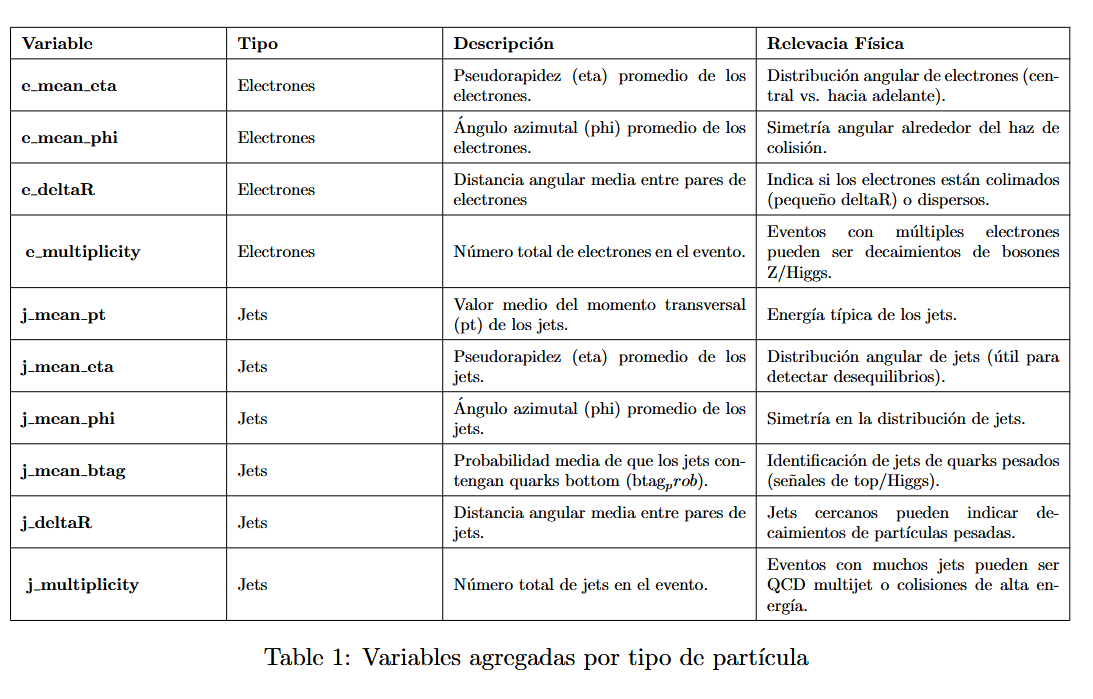

## Normalización de los datos

`e_mean_pt` y `j_mean_pt` usan Log + RobustScaler porque su distribución es log-normal y puede tener valores extremos.

`e_mean_eta` y `j_mean_eta` usan MinMaxScaler en [−1,1] para preservar la simetría.

La p**seudo-rapidez** η creo que se define como: η = -ln·tan(Ø / 2) donde θ es el ángulo polar medido con respecto al eje del haz de partículas.

*¿Al mapear η al rango [−1,1], se evita que valores extremos dominen el entrenamiento en modelos de Machine Learning?*



`j_mean_btag`, al ser una probabilidad está en un rango entre [0,1], pero  normalizo para evitar valores extremos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import numpy as np

class AggregatedDataNormalizer:
    def __init__(self):
        # Configuración para variables agregadas
        self.scalers = {
            # Variables de electrones
            'e_mean_pt': ('log', RobustScaler()),
            'e_mean_eta': ('direct', MinMaxScaler(feature_range=(-1, 1))), # CREO QUE ESTO NO DEBERÍA HACERLO
            'e_mean_phi': ('direct', MinMaxScaler(feature_range=(-1, 1))),
            'e_deltaR': ('direct', MinMaxScaler(feature_range=(0, 1))),

            # Variables de jets
            'j_mean_pt': ('log', RobustScaler()),
            'j_mean_eta': ('direct', MinMaxScaler(feature_range=(-1, 1))),
            'j_mean_phi': ('direct', MinMaxScaler(feature_range=(-1, 1))),
            'j_mean_btag': ('direct', MinMaxScaler(feature_range=(0, 1))),
            'j_deltaR': ('direct', MinMaxScaler(feature_range=(0, 1))),

            # Variables globales
            'event_eta_centrality': ('direct', MinMaxScaler(feature_range=(-1, 1))),
        }

        # Features que NO se normalizan (multiplicidades, cargas, etc.)
        self.non_normalized = ['e_multiplicity', 'j_multiplicity']

    def fit(self, data):
        # Convertir lista de diccionarios a arrays por feature
        for feature, (transform_type, scaler) in self.scalers.items():
            values = np.array([event.get(feature, 0) for event in data])

            if transform_type == 'log':
                values = np.log(values + 1e-6)  # Evitar log(0)

            scaler.fit(values.reshape(-1, 1))
        return self

    def transform(self, data):
        normalized_data = []
        for event in data:
            new_event = {}
            # Aplicar normalización
            for feature, (transform_type, scaler) in self.scalers.items():
                value = event.get(feature, 0)

                if transform_type == 'log':
                    value = np.log(value + 1e-6)

                new_event[feature] = float(scaler.transform([[value]])[0][0])

            # Copiar features no normalizadas
            for feature in self.non_normalized:
                if feature in event:
                    new_event[feature] = event[feature]

            normalized_data.append(new_event)
        return normalized_data

In [ ]:
import pandas as pd

# Convierte tu lista de diccionarios a DataFrame
df_aggregated = pd.DataFrame(aggregated_data)

# Ahora puedes usar el normalizador
normalizer = AggregatedDataNormalizer()
normalized_data = normalizer.fit(aggregated_data).transform(aggregated_data)


In [ ]:
values = pd.DataFrame(normalized_data)
values.to_csv('datos_normalizados.csv', index=False, float_format='%.6f')  # 6 decimales
df = pd.read_csv('datos_normalizados.csv')
display(df)

,e_mean_pt,e_mean_eta,e_mean_phi,e_deltaR,j_mean_pt,j_mean_eta,j_mean_phi,j_mean_btag,j_deltaR,event_eta_centrality,e_multiplicity,j_multiplicity
0,-0.392007,-0.564724,-0.620741,0.768461,0.508880,-0.063498,0.179956,0.677141,0.451780,-0.196510,2,6
1,0.092882,0.443834,-0.056144,0.319775,0.191166,0.004249,-0.288296,0.267570,0.295092,0.430658,3,5
2,-0.062377,0.723218,-0.608221,0.393602,-0.185414,0.312598,-0.251706,0.326441,0.614123,0.534625,2,5
3,0.079299,-0.992013,0.128270,0.572046,-0.654848,0.095938,-0.234148,0.320310,0.877101,-0.206017,2,9
4,-0.823285,0.330874,-0.186490,0.411593,1.551126,0.260366,0.512914,0.108997,0.277829,0.334212,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-19.418829,0.010664,-0.077440,0.000000,-0.688899,-0.578620,-0.117998,0.267904,0.485366,-0.951106,0,4
96,0.197994,0.407452,-0.396604,0.460243,0.160804,0.028339,-0.500542,0.252237,0.428454,0.385674,3,5
97,0.239652,0.011459,0.590196,0.353472,0.597930,-0.000540,0.508697,0.343824,0.131140,0.044436,4,7
98,0.219640,-1.000000,0.443638,0.090360,-0.245375,-0.409648,-0.288980,0.411912,0.503222,-0.847666,2,7


from matplotlib import pyplot as plt
df['e_mean_pt'].plot(kind='hist', bins=20, title='e_mean_pt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['e_mean_eta'].plot(kind='hist', bins=20, title='e_mean_eta')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['e_mean_phi'].plot(kind='hist', bins=20, title='e_mean_phi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['e_deltaR'].plot(kind='hist', bins=20, title='e_deltaR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='e_mean_pt', y='e_mean_eta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='e_mean_eta', y='e_mean_phi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='e_mean_phi', y='e_deltaR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='e_deltaR', y='j_mean_pt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['e_mean_pt'].plot(kind='line', figsize=(8, 4), title='e_mean_pt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['e_mean_eta'].plot(kind='line', figsize=(8, 4), title='e_mean_eta')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['e_mean_phi'].plot(kind='line', figsize=(8, 4), title='e_mean_phi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['e_deltaR'].plot(kind='line', figsize=(8, 4), title='e_deltaR')
plt.gca().spines[['top', 'right']].set_visible(False)

## **Reducción de dimensionalidad**

El análisis de componentes principales (PCA) reduce la cantidad de dimensiones en grandes conjuntos de datos a componentes principales que conservan la mayor parte de la información original. Para ello, transforma las variables potencialmente correlacionadas en un conjunto más pequeño de variables, denominadas componentes principales. [PCA - IBM ](https://www.ibm.com/es-es/topics/principal-component-analysis)

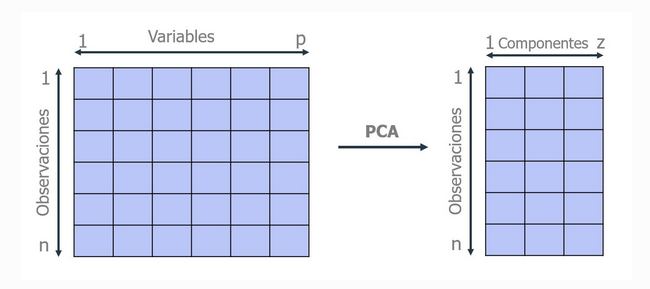

Para determinar el número óptimo de componentes en PCA, voy a usar métodos basádos en datos como puede ser el **método del codo** de varianza acumulada. De esta manera elegiré el número de componetes donde la curva se estabiliza que suele ser un 95% de la varianza

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(values)

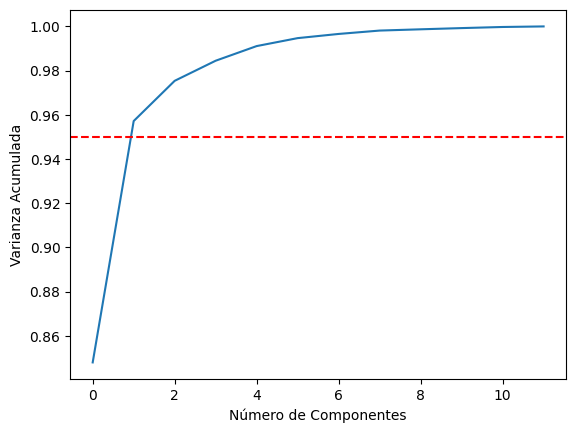

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--')  # Límite del 95%
plt.show()

In [ ]:
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.98)[0][0] + 1
print("Número de componentes necesarios ")
print(int(n_components))

Número de componentes necesarios 
4


In [ ]:
pca = PCA(n_components=3).fit(values)  # Ajuste
principal_components = pca.transform(values)

In [ ]:
principal_components_df = pd.DataFrame(
    data    = pca.components_,  # Access components_ from the fitted PCA object
    columns = values.columns,
    index   = ['PC1', 'PC2', 'PC3'] # Adjust index to match n_components
)

`components_ ` contiene el valor de los loadings ϕ que definen cada componente (eigenvector). Las filas se corresponden con las **componentes principals** (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada. [PCA con Python](https://cienciadedatos.net/documentos/py19-pca-python)

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

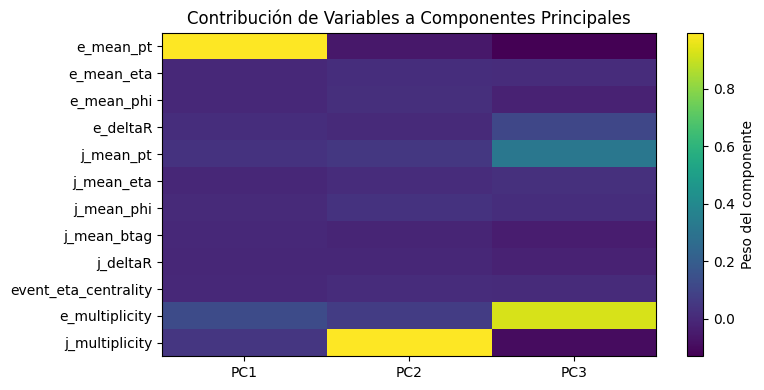

In [ ]:

nombres_variables = values.columns

fig, ax = plt.subplots(figsize=(8, 4))
componentes = pca.components_
im = ax.imshow(componentes.T, cmap='viridis', aspect='auto')


ax.set_yticks(range(len(nombres_variables)))
ax.set_yticklabels(nombres_variables)
ax.set_xticks(range(pca.n_components_))
ax.set_xticklabels([f"PC{i+1}" for i in range(pca.n_components_)])


plt.colorbar(im, label='Peso del componente')
plt.title("Contribución de Variables a Componentes Principales")
plt.grid(False)
plt.tight_layout()
plt.show()

## Interpretación de los PCs (Ejemplo)

**PC1: Suele representar la "tendencia general" de los datos.**

- **Ejemplo:** En datos de pacientes, podría correlacionarse con "gravedad de la enfermedad".

**PC2/PC3: Capturan patrones secundarios (ortogonales a PC1).**

- **Ejemplo:** Si PC1 es "gravedad", PC2 podría separar pacientes por "edad avanzada vs. joven".



---



## Características de los PCs

Ordenados por importancia:

- **PC1 es la dirección con máxima varianza en los datos.**

- **PC2 es la dirección con la siguiente mayor varianza** (y ortogonal a PC1).

Y así sucesivamente.

- **No correlacionados:** Los PCs son independientes entre sí (correlación = 0).

- **Varianza explicada:** Cada PC tiene un autovalor asociado que indica cuánta varianza de los datos originales captura.


---

## Colores del Heatmap

Los colores en el heatmap representan los pesos (coeficientes) de las variables originales en cada componente principal (PC1, PC2, etc.). Estos pesos indican cómo contribuye cada variable a la dirección de cada PC.

- **Valores positivos altos **(amarillo/verde en 'viridis'): La variable tiene una contribución fuerte y positiva al componente.

- **Valores negativos altos** (morado/azul oscuro en 'viridis'): La variable contribuye negativamente al componente.

- **Valores cercanos a cero** (verde medio): Contribución débil.




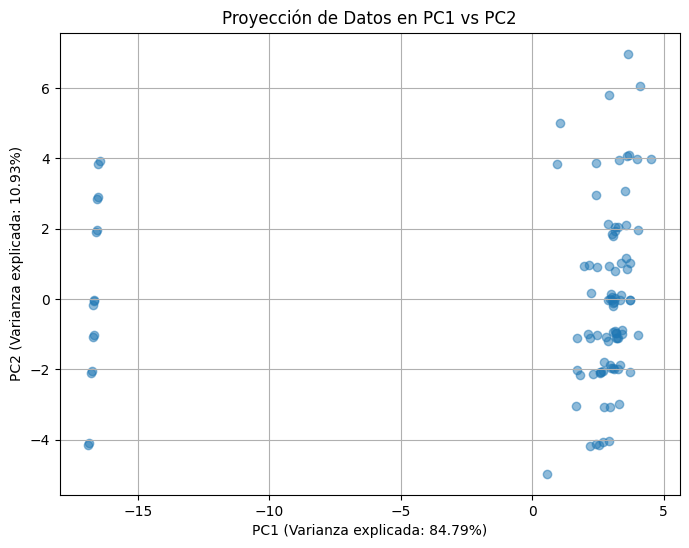

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel(f'PC1 (Varianza explicada: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (Varianza explicada: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Proyección de Datos en PC1 vs PC2')
plt.grid(True)
plt.show()